<a href="https://colab.research.google.com/github/MuhammadIrzam447/visionCodes/blob/master/text_ferramenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Testing/text-ferramenta-train.csv/text-ferramenta-train.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

# EDA

In [ ]:
# Rename the head of the column
df.columns = ['text']

In [ ]:
# Create the Label Column
df['label'] = df['text'].str.split("\|_@", n=1).str[1]
df['text'] = df['text'].str.split("\|_@", n=1).str[0]

In [ ]:
# Drop the duplicate and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace = True) 
df.reset_index(drop = True, inplace = True)

# Cleaning Data

In [ ]:
# 32 g/gr/ (32 grams)
# 15 mm (15 milimeter) 
# kg (kilogaram)
# kwb ?
# lb (pounds)
# cm (centimeter)
# sw ?
# oz 
# tm
# p 
# pesso

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
df2['text'] = df2['text'].str.lower()

In [ ]:
# import re
# df2['text'] = df2['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
# removing everything except alphabets is drastic as it is making a huge change in input data. how to do it better. 

In [ ]:
df2['text'] = df2['text'].apply(word_tokenize, language = "italian")

In [ ]:
stop_words = set(stopwords.words('italian'))
df2['text'] = df2['text'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('italian')
df2['text'] = df2['text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
replacements = {'kg': 'kilogram',
                'mm': 'millimeter', 
                'cm': 'centimeter',
                'gr': 'gram',
                'g': 'gram',
                'lb': 'pounds',
                'oz': 'ounce',
                'mv': 'milivott',
                'm': 'meter',
                'ft': 'feet'}

In [ ]:
def replace_words(tokens):
    return [replacements.get(token, token) for token in tokens]

In [ ]:
df2['text'] = df2['text'].apply(replace_words)

In [ ]:
df2.head(10)

# Top 10 Words in Text

In [ ]:
# Joining the words back into a single text
df2['final_text'] = df2['text'].apply(lambda x: ' '.join(x))

In [ ]:
import matplotlib.pyplot as plt
import collections
words = []
for text in df2['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Dark Background
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

# Word Embedding using Word2Vec

In [ ]:
import gensim
from gensim import models
from gensim.models import Word2Vec

In [ ]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("word2vec-google-news-300") 

In [ ]:
tokenized_data = df['text'].apply(lambda x: x.split())

In [ ]:
tokenized_data

In [ ]:
import numpy as np
embeddings = np.zeros((len(tokenized_data), model.vector_size))

In [ ]:
# Try this one instead
for i, tokens in enumerate(tokenized_data):
    for token in tokens:
        if token in model:
            embeddings[i] += model[token]

In [ ]:
embeddings[10]

In [ ]:
embeddings /= np.linalg.norm(embeddings, axis=1, keepdims=True)

In [ ]:
embeddings[10]

# Transform Label using Label Encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df2['label'])

In [ ]:
# Transform the labels into numerical values
df2['label'] = label_encoder.transform(df2['label'])

In [ ]:
df2['label'].value_counts()

# Transform Label using one hot encoding


In [ ]:
# using one hot encoding 
df3 = df.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

In [ ]:
labels_reshaped = df3['label'].values.reshape(-1, 1)
onehot_labels = onehot_encoder.fit_transform(labels_reshaped)
onehot_labels = onehot_labels.toarray()
onehot_df = pd.DataFrame(onehot_labels, columns=onehot_encoder.categories_[0])
df3 = pd.concat([df3, onehot_df], axis=1)


# Fine Tuning Bert Base

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.8 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    
    stop_words = set(stopwords.words('italian'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    
    stemmer = SnowballStemmer('italian')
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    text = ' '.join(stemmed_tokens)
    
    replacements = {'kg': 'kilogram',
                    'mm': 'millimeter',
                    'cm': 'centimeter',
                    'gr': 'gram',
                    'g': 'gram',
                    'lb': 'pounds',
                    'oz': 'ounce',
                    'mv': 'milivott',
                    'm': 'meter',
                    'ft': 'feet'}

    tokens = text.split()
    replaced_tokens = [replacements.get(token, token) for token in tokens]
    text = ' '.join(replaced_tokens)
    
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
num_labels = df['label'].nunique()
print(num_labels)

52


In [ ]:
# df = pd.get_dummies(df, columns=['label'])

In [ ]:
from transformers import AutoModel, AutoTokenizer, BertForSequenceClassification
import torch

model_name = "dbmdz/bert-base-italian-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# from transformers import BertTokenizer, BertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
# model = BertModel.from_pretrained("bert-base-multilingual-cased")
# text = "Replace me by any text you'd like."
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)

Some weights of the model checkpoint at dbmdz/bert-base-italian-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

In [ ]:
# from transformers import BertTokenizer, BertForSequenceClassification
# import torch

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class FragmentaDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.label_encoder = LabelEncoder()
        self.labels = self.data['label']
        self.encoded_labels = self.label_encoder.fit_transform(self.labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]['text']
        label = self.encoded_labels[index]
        label_tensor = torch.tensor(label)  # Convert label to tensor

        # Preprocess text
        processed_text = preprocess_text(text)

        # Tokenize and convert text to input tensors
        inputs = self.tokenizer.encode_plus(
            processed_text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()

        return input_ids, attention_mask, label_tensor


In [ ]:
# Define the maximum sequence length for padding/truncation
max_length = 128

# Create an instance of the custom dataset
dataset = FragmentaDataset(df, tokenizer, max_length)

# Create a data loader
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
# increased with 0.001
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
num_epochs = 10
training_loss = []

In [ ]:
# num_labels = df.shape[1]
# print(num_labels)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
training_loss = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in data_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        # print(outputs)
        logits = outputs.logits
        # logits = outputs[0] 

        # Compute loss
        loss = loss_fn(logits, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = total_loss / len(data_loader)
    training_loss.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

Epoch 1/10, Average Loss: 1.3569
Epoch 2/10, Average Loss: 0.8422
Epoch 3/10, Average Loss: 0.8768
Epoch 4/10, Average Loss: 0.7317
Epoch 5/10, Average Loss: 0.7730
Epoch 6/10, Average Loss: 0.7231
Epoch 7/10, Average Loss: 0.6991
Epoch 8/10, Average Loss: 0.6606
Epoch 9/10, Average Loss: 0.6305
Epoch 10/10, Average Loss: 1.7278


In [ ]:
# Save the fine-tuned model
save_dir = '/content/drive/MyDrive/Colab Notebooks/ferramenta'
model.save_pretrained(save_dir)

# Validation

In [ ]:
val_path = "/content/drive/MyDrive/Colab Notebooks/Testing/text-ferramenta-val.csv/text-ferramenta-val.csv"

In [ ]:
valdf = pd.read_csv(val_path)

In [ ]:
# Rename the head of the column
valdf.columns = ['text']

In [ ]:
# Create the Label Column
valdf['label'] = valdf['text'].str.split("\|_@", n=1).str[1]
valdf['text'] = valdf['text'].str.split("\|_@", n=1).str[0]

In [ ]:
# Drop the duplicate and null values
valdf.drop_duplicates(inplace=True)
valdf.dropna(inplace = True) 
valdf.reset_index(drop = True, inplace = True)

In [ ]:
val_num_labels = valdf['label'].nunique()
print(val_num_labels)

52


In [ ]:
# valdf = pd.get_dummies(valdf, columns=['label'])

In [ ]:
# Define the maximum sequence length for padding/truncation
max_length = 128

# Create an instance of the custom dataset
val_dataset = FragmentaDataset(valdf, tokenizer, max_length)

# Create a data loader
batch_size = 32
val_data_loader = DataLoader(val_dataset, batch_size=batch_size)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

predictions = []
targets = []
val_loss = 0

with torch.no_grad():
    for batch in val_data_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        val_loss += loss.item()

        _, predicted_labels = torch.max(outputs.logits, dim=1)

        predictions.extend(predicted_labels.cpu().tolist())
        targets.extend(labels.cpu().tolist())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

avg_val_loss = val_loss / len(val_data_loader)
accuracy = accuracy_score(targets, predictions)
precision = precision_score(targets, predictions, average='weighted')
recall = recall_score(targets, predictions, average='weighted')
f1 = f1_score(targets, predictions, average='weighted')

print(f"Validation Loss: {avg_val_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Validation Loss: 6.6644
Accuracy: 0.1013
Precision: 0.0103
Recall: 0.1013
F1 Score: 0.0186


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

# Calculate evaluation metrics
# accuracy = accuracy_score(targets, predictions)
report = classification_report(targets, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.10125414976023607
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00      1875
           2       0.00      0.00      0.00       339
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00       131
           5       0.00      0.00      0.00       176
           6       0.00      0.00      0.00      1067
           7       0.00      0.00      0.00       145
           8       0.00      0.00      0.00       663
           9       0.00      0.00      0.00       607
          10       0.00      0.00      0.00       122
          11       0.00      0.00      0.00        35
          12       0.00      0.00      0.00       112
          13       0.00      0.00      0.00       821
          14       0.00      0.00      0.00      1553
          15       0.00      0.00      0.00        36
          16       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


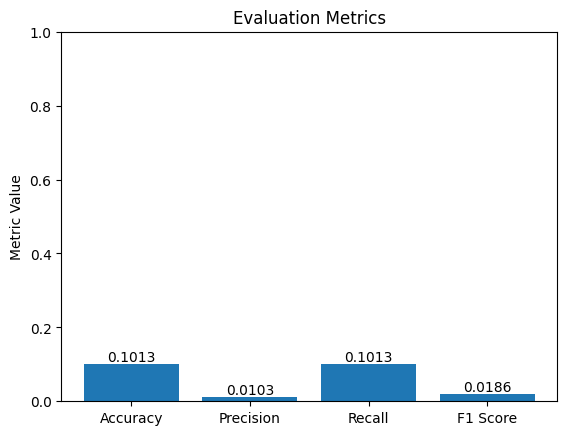

In [ ]:
import matplotlib.pyplot as plt
# Define the labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the values for each metric
values = [accuracy, precision, recall, f1]

fig, ax = plt.subplots()
bars = ax.bar(metrics, values)
plt.ylim([0, 1])  # Set the y-axis limit to range from 0 to 1
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics')

# Add the metric scores on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()